In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('tows.csv')

In [3]:
# Checking the most common companies in "Trade Name" to identify the top 10
top_companies = df['Trade Name'].value_counts().head(5).index

# Filtering the dataset for rows with these top 5 companies
top_companies_data = df[df['Trade Name'].isin(top_companies)]

# Converting "Tow Date" column to datetime format
top_companies_data['Tow Date'] = pd.to_datetime(top_companies_data['Tow Date'], errors='coerce')

C:\Users\Home\AppData\Local\Temp\ipykernel_34800\2360060441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_companies_data['Tow Date'] = pd.to_datetime(top_companies_data['Tow Date'], errors='coerce')


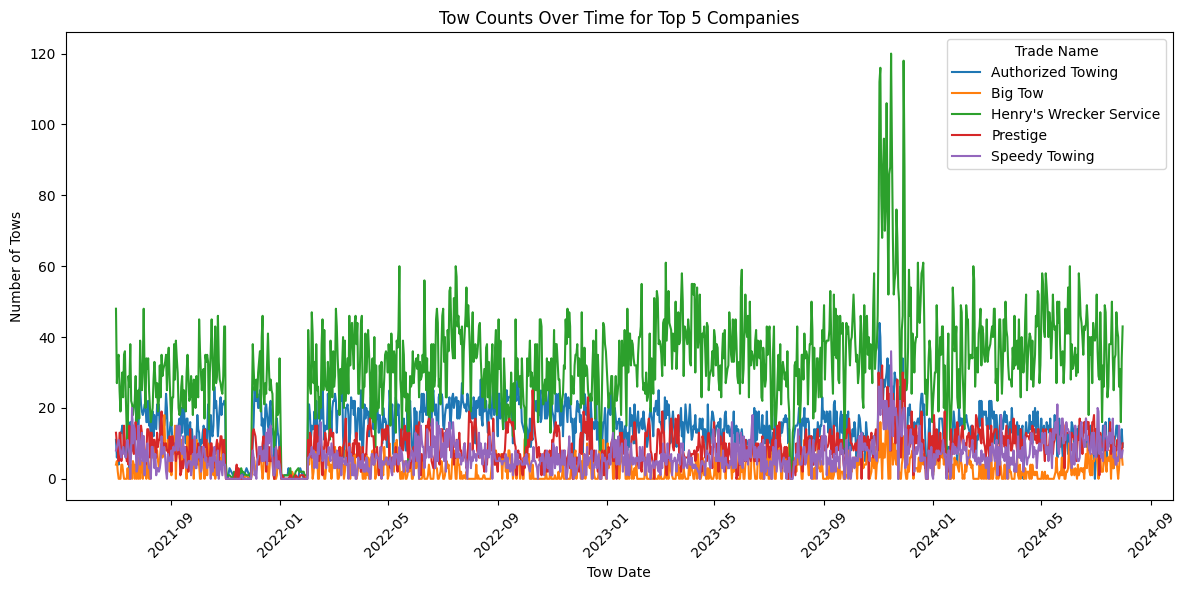

In [4]:
# Aggregating tow counts by date for each top company
top_companies_daily_counts = top_companies_data.groupby(['Tow Date', 'Trade Name']).size().unstack(fill_value=0)

# Plotting the line plot for the top 5 companies by Tow Date
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for company in top_companies_daily_counts.columns:
    plt.plot(top_companies_daily_counts.index, top_companies_daily_counts[company], label=company)

plt.title('Tow Counts Over Time for Top 5 Companies')
plt.xlabel('Tow Date')
plt.ylabel('Number of Tows')
plt.legend(title='Trade Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


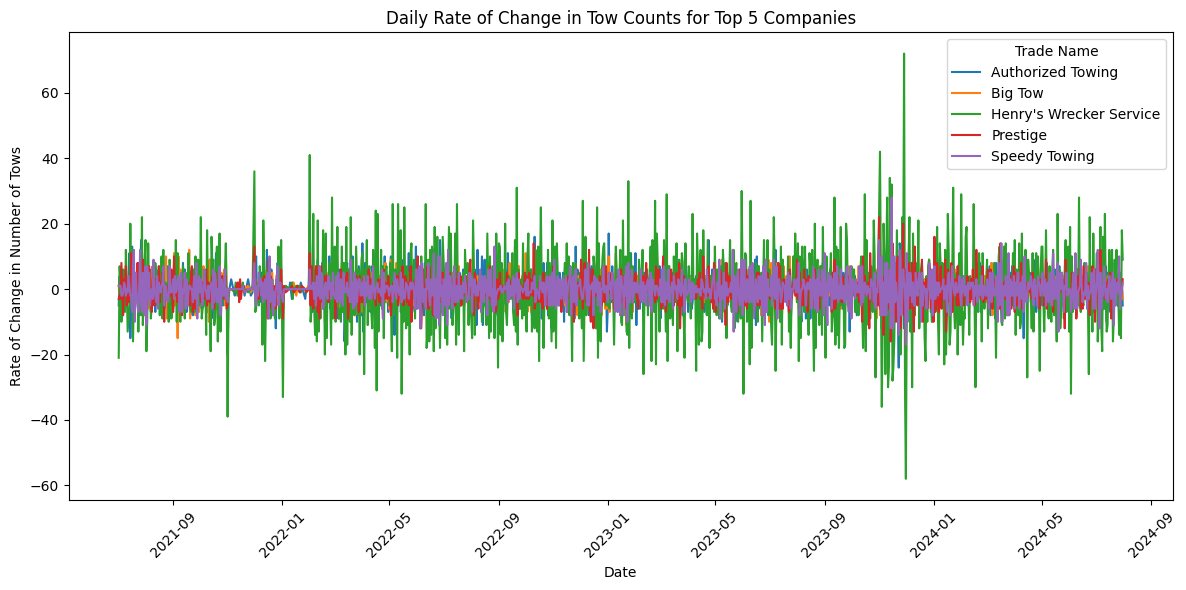

In [6]:


# Aggregating tow counts by date for each top company in the new dataset
top_five_daily_counts = top_companies_data.groupby(['Tow Date', 'Trade Name']).size().unstack(fill_value=0)

# Renaming the dataset to `df` to use the code provided by user
df = top_five_daily_counts

# Calculating the daily rate of change (differential)
df_daily_rate_of_change = df.diff()

# Plotting the daily rate of change
plt.figure(figsize=(12, 6))
for company in df_daily_rate_of_change.columns:
    plt.plot(df_daily_rate_of_change.index, df_daily_rate_of_change[company], label=company)

plt.title('Daily Rate of Change in Tow Counts for Top 5 Companies')
plt.xlabel('Date')
plt.ylabel('Rate of Change in Number of Tows')
plt.legend(title='Trade Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Home\AppData\Local\Temp\ipykernel_34800\1159318745.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df.resample('M').mean()


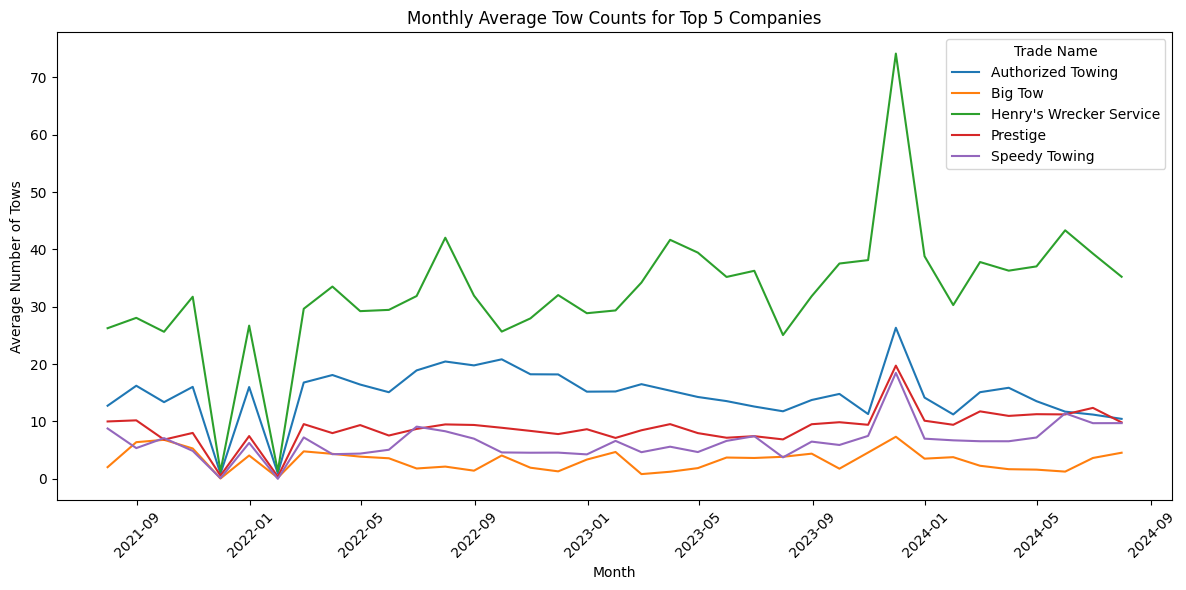

In [7]:

# Renaming the dataset to `df` to use the code provided by user
df = top_five_daily_counts

# Resampling with 'ME' for month-end frequency and calculating the mean
df_monthly_avg = df.resample('M').mean()

# Plotting the monthly averages with the updated resampling frequency
plt.figure(figsize=(12, 6))
for company in df_monthly_avg.columns:
    plt.plot(df_monthly_avg.index, df_monthly_avg[company], label=company)

plt.title('Monthly Average Tow Counts for Top 5 Companies')
plt.xlabel('Month')
plt.ylabel('Average Number of Tows')
plt.legend(title='Trade Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


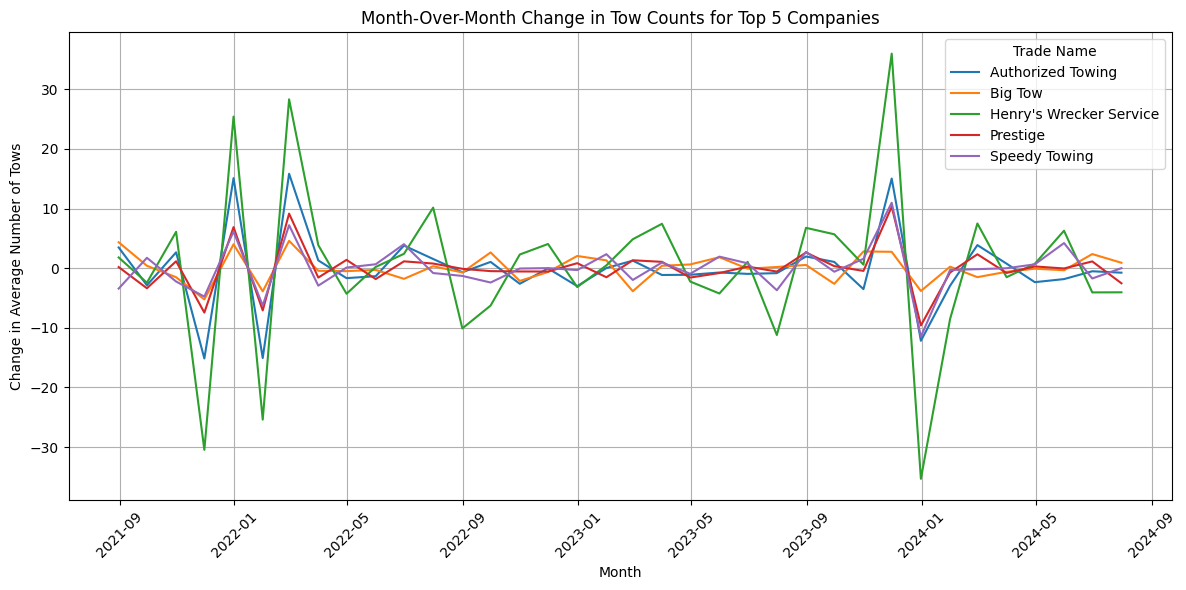

In [8]:
df_monthly_derivative = df_monthly_avg.diff()
# Plotting the month-over-month changes as a line graph
plt.figure(figsize=(12, 6))
for company in df_monthly_derivative.columns:
    plt.plot(df_monthly_derivative.index, df_monthly_derivative[company], label=company)

plt.title('Month-Over-Month Change in Tow Counts for Top 5 Companies')
plt.xlabel('Month')
plt.ylabel('Change in Average Number of Tows')
plt.legend(title='Trade Name')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# Monthly Averages Plot
import plotly.express as px
import plotly.graph_objects as go

# Create the monthly averages plot
fig1 = go.Figure()

# Add a trace for each company
for company in df_monthly_avg.columns:
    fig1.add_trace(
        go.Scatter(
            x=df_monthly_avg.index,
            y=df_monthly_avg[company],
            name=company,
            mode='lines'
        )
    )

# Update layout
fig1.update_layout(
    title='Monthly Average Tow Counts for Top Companies',
    xaxis_title='Month',
    yaxis_title='Average Number of Tows',
    width=1200,
    height=600,
    showlegend=True,
    legend_title='Trade Name',
    plot_bgcolor='white'
)


fig1.show()

# Month-over-Month Changes Plot
fig2 = go.Figure()

# Add a trace for each company
for company in df_monthly_derivative.columns:
    fig2.add_trace(
        go.Scatter(
            x=df_monthly_derivative.index,
            y=df_monthly_derivative[company],
            name=company,
            mode='lines'
        )
    )

# Update layout
fig2.update_layout(
    title='Month-Over-Month Change in Tow Counts for Top Companies',
    xaxis_title='Month',
    yaxis_title='Change in Average Number of Tows',
    width=1200,
    height=600,
    showlegend=True,
    legend_title='Trade Name',
    plot_bgcolor='white'
)


fig2.show()

# Save as interactive HTML files
fig1.write_html("monthly_averages.html")
fig2.write_html("monthly_changes.html")


In [25]:
# Monthly Averages Plot
import plotly.express as px
import plotly.graph_objects as go

# Get the Antique color sequence
colors = px.colors.qualitative.T10

# Create the monthly averages plot
fig1 = go.Figure()

# Add a trace for each company
for idx, company in enumerate(df_monthly_avg.columns):
    fig1.add_trace(
        go.Scatter(
            x=df_monthly_avg.index,
            y=df_monthly_avg[company],
            name=company,
            mode='lines',
            line=dict(color=colors[idx % len(colors)])  # Use modulo to cycle through colors if needed
        )
    )

# Update layout
fig1.update_layout(
    title='Monthly Average Tow Counts for Top 5 Towing Companies',
    xaxis_title='Month',
    yaxis_title='Average Number of Tows',
    width=820,
    height=580,
    showlegend=True,
    legend_title='Towing Company',
    plot_bgcolor='white'
)

fig1.update_xaxes(
    showgrid=True, 
    gridwidth=1, 
    gridcolor='LightGray',
    showline=True,
    linewidth=2,
    linecolor='black',
    mirror=False
)

fig1.update_yaxes(
    showgrid=False, 
    gridwidth=1, 
    gridcolor='LightGray',
    showline=True,
    linewidth=2,
    linecolor='black',
    mirror=False
)

years = [2022, 2023, 2024]

# Add vertical lines at the beginning of each year
for year in years:
    fig1.add_vline(x=pd.Timestamp(f'{year}-01-01'), line_width=1, line_color='grey')

# Add vertical lines at the beginning of each fiscayear
for year in years:
    fig1.add_vline(x=pd.Timestamp(f'{year}-07-01'), line_width=1, line_color='grey', line_dash='dash')

fig1.show()

# Month-over-Month Changes Plot
fig2 = go.Figure()

# Add a trace for each company
for idx, company in enumerate(df_monthly_derivative.columns):
    fig2.add_trace(
        go.Scatter(
            x=df_monthly_derivative.index,
            y=df_monthly_derivative[company],
            name=company,
            mode='lines',
            line=dict(color=colors[idx % len(colors)])  # Use same colors as first plot
        )
    )

# Update layout
fig2.update_layout(
    title='Month-Over-Month Change in Tow Counts for Top 5 TowingCompanies',
    xaxis_title='Month',
    yaxis_title='Change in Average Number of Tows',
    width=820,
    height=580,
    showlegend=True,
    legend_title='Towing Company',
    plot_bgcolor='white'
)

fig2.update_xaxes(
    showgrid=False, 
    gridwidth=1, 
    gridcolor='LightGray',
    showline=False,
    linewidth=2,
    linecolor='black',
    mirror=False
)
fig2.update_yaxes(
    showgrid=True, 
    gridwidth=1, 
    gridcolor='LightGray',
    showline=True,
    linewidth=2,
    linecolor='black',
    mirror=False
)

fig2.add_hline(y=0, line_width=1, line_color='black')

years = [2022, 2023, 2024]

# Add vertical lines at the beginning of each year
for year in years:
    fig2.add_vline(x=pd.Timestamp(f'{year}-01-01'), line_width=1, line_color='grey')

# Add vertical lines at the beginning of each fiscayear
for year in years:
    fig2.add_vline(x=pd.Timestamp(f'{year}-07-01'), line_width=1, line_color='grey', line_dash='dash')

fig2.show()

# Save as interactive HTML files
fig1.write_html("monthly_averages.html")
fig2.write_html("monthly_changes.html")

In [ ]:
df_monthly_derivative

In [26]:
len(df)

1099